<a href="https://colab.research.google.com/github/Joohhnnyyy/test-sets/blob/main/new_test_set3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost
!pip install xgboost
!pip install visualkeras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 16.4 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact


from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, Perceptron, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import (
    ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier,
    VotingClassifier, StackingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier,
    IsolationForest)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation, LabelSpreading


from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


import joblib
import pickle
import os
import zipfile

In [3]:
df = pd.read_csv("new_test_set2.csv")

In [4]:
df.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer'],
      dtype='object')

In [5]:
df.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea


In [6]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,28.630435,64.557971,42.840580,28.521739,10.144928,21.115942
std,5.088082,11.880236,11.507275,29.121989,13.456956,14.920514
min,0.000000,50.000000,25.000000,0.000000,0.000000,0.000000
25%,26.000000,54.000000,33.000000,10.000000,0.000000,8.000000
50%,29.000000,62.000000,41.000000,15.000000,0.000000,20.000000
75%,32.000000,68.000000,51.000000,37.000000,18.000000,36.000000
max,38.000000,95.000000,65.000000,126.000000,59.000000,54.000000


In [7]:
df['Soil_Type'].unique()

array(['Clayey', 'Loamy', 'Red', 'Black', 'Sandy'], dtype=object)

Index(['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer'],
      dtype='object')


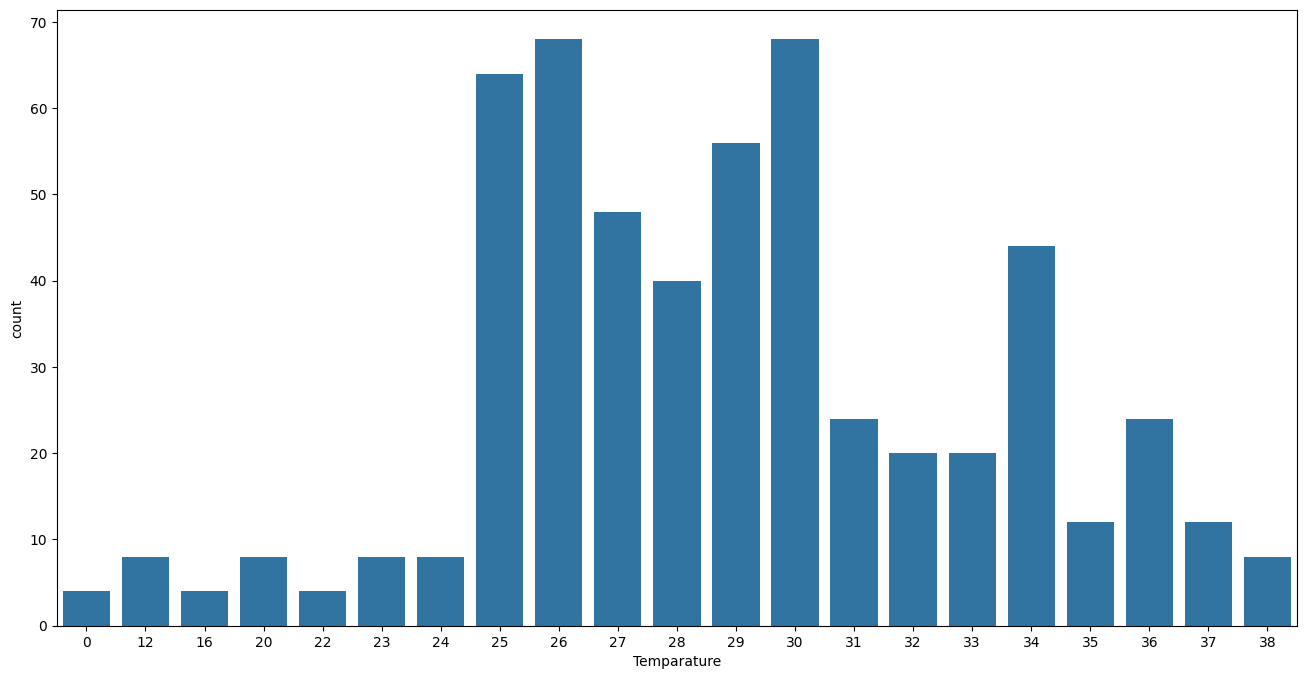

In [8]:
print(df.columns)


plt.figure(figsize=(16, 8))
sns.countplot(x='Temparature', data=df)
plt.show()

Index(['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer'],
      dtype='object')


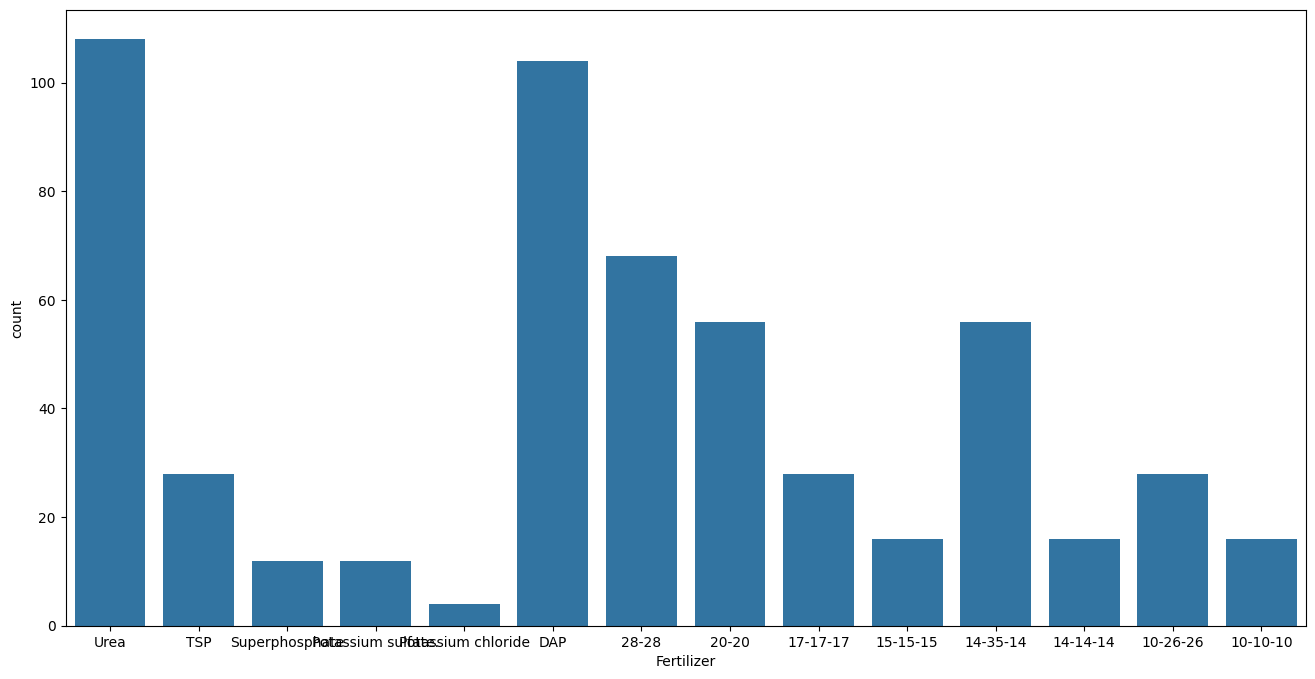

In [9]:

print(df.columns)


plt.figure(figsize=(16, 8))
sns.countplot(x='Fertilizer', data=df)
plt.show()

In [10]:
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = df['Fertilizer'])

def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer'], ax=axes[1])

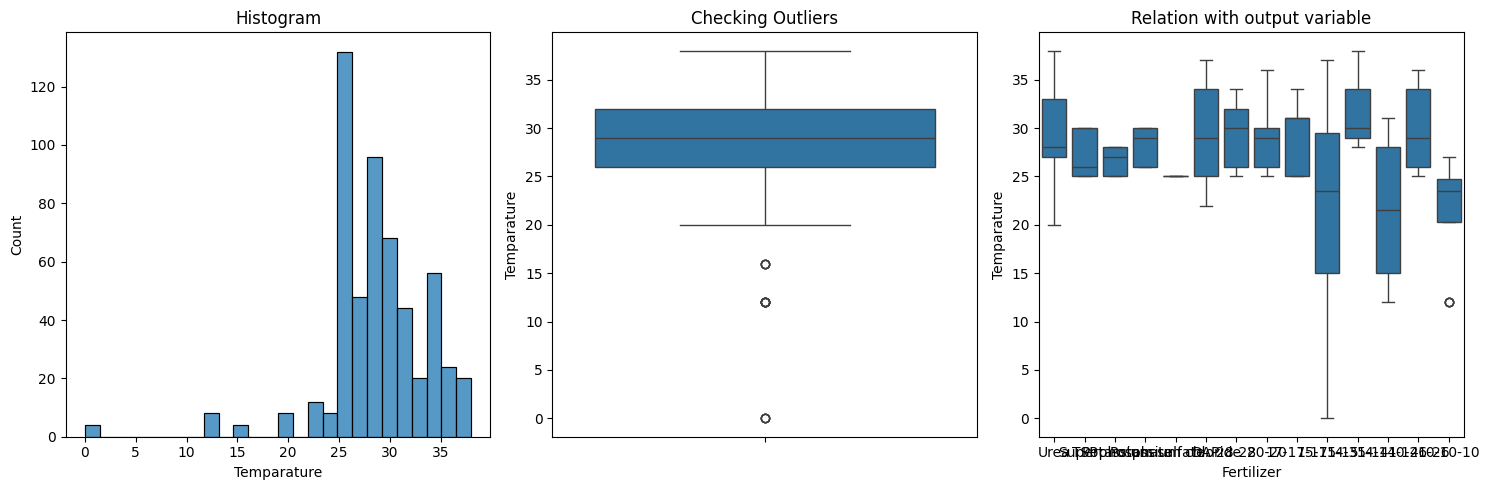

In [11]:
plot_conti(df['Temparature'])

<Axes: xlabel='Soil_Type', ylabel='Temparature'>

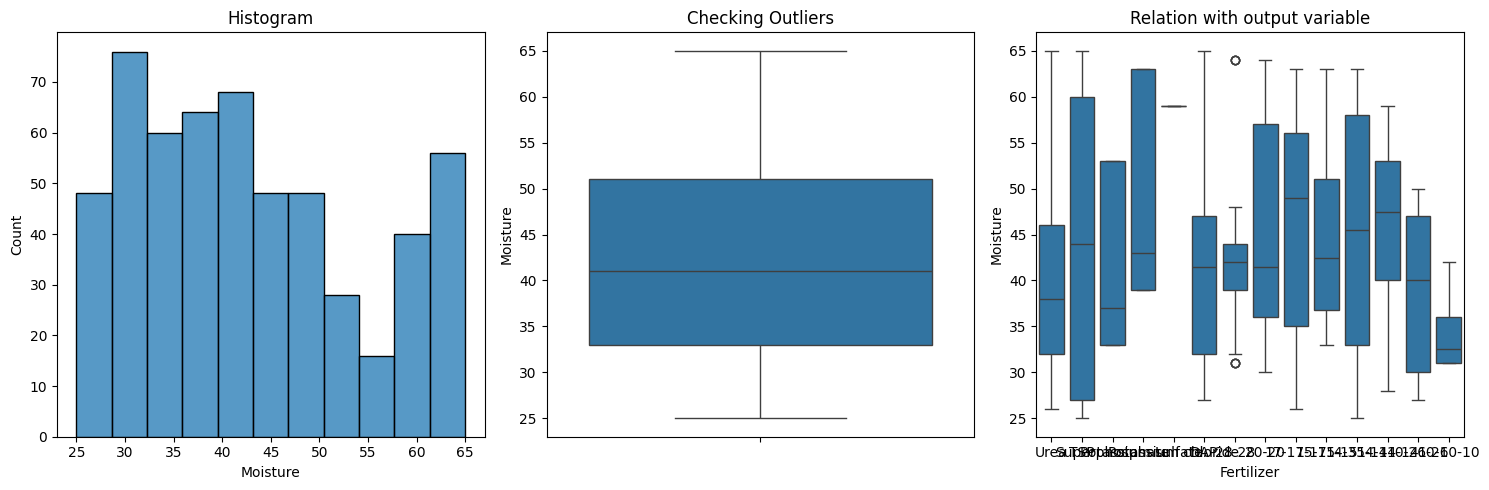

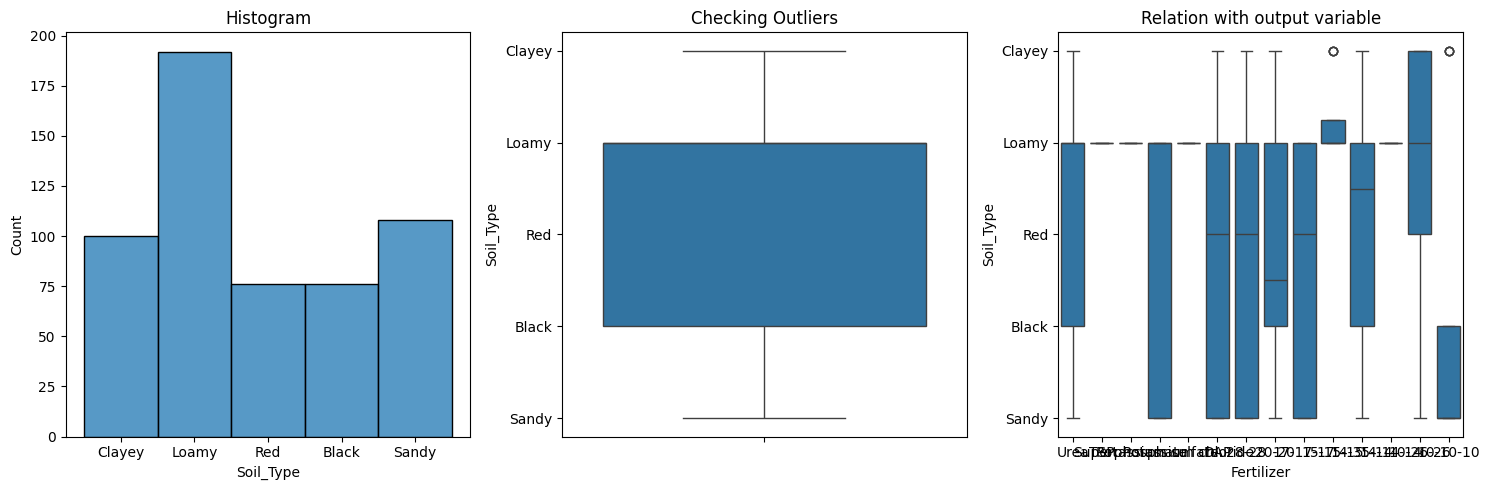

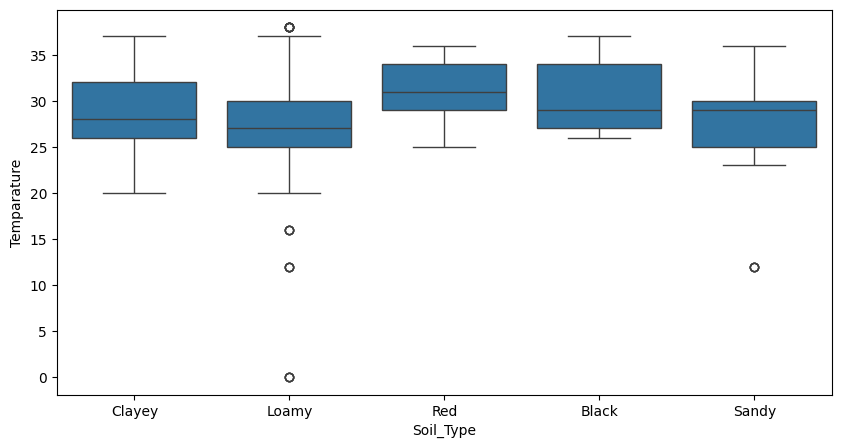

In [12]:
plot_conti(df['Moisture'])
plot_conti(df['Soil_Type'])
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Soil_Type'],y=df['Temparature'])

<Axes: xlabel='Soil_Type', ylabel='Temparature'>

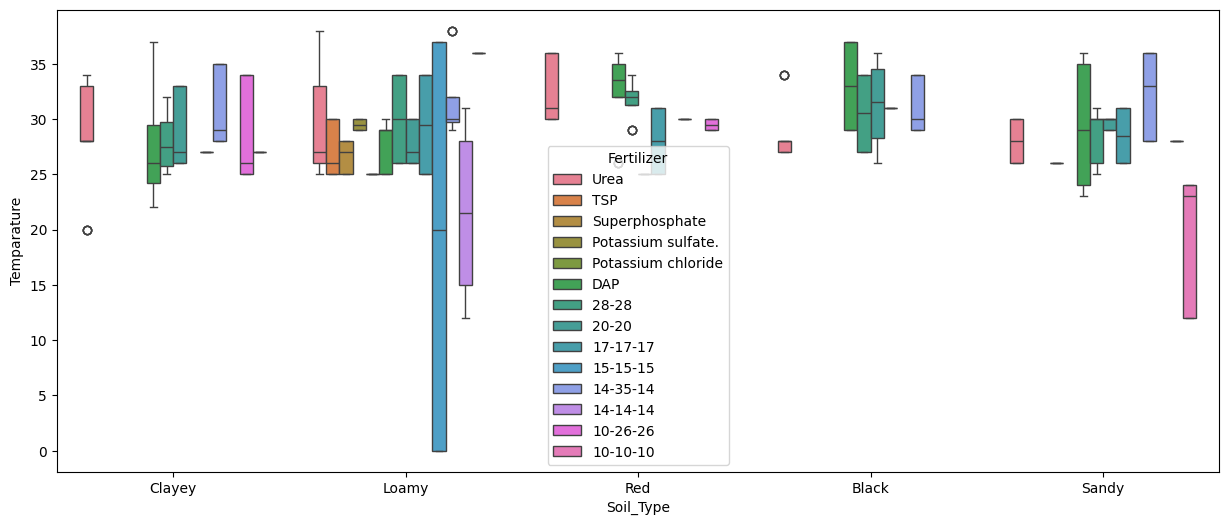

In [13]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Soil_Type'],y=df['Temparature'],hue=df['Fertilizer'])

<Axes: xlabel='Crop_Type', ylabel='Temparature'>

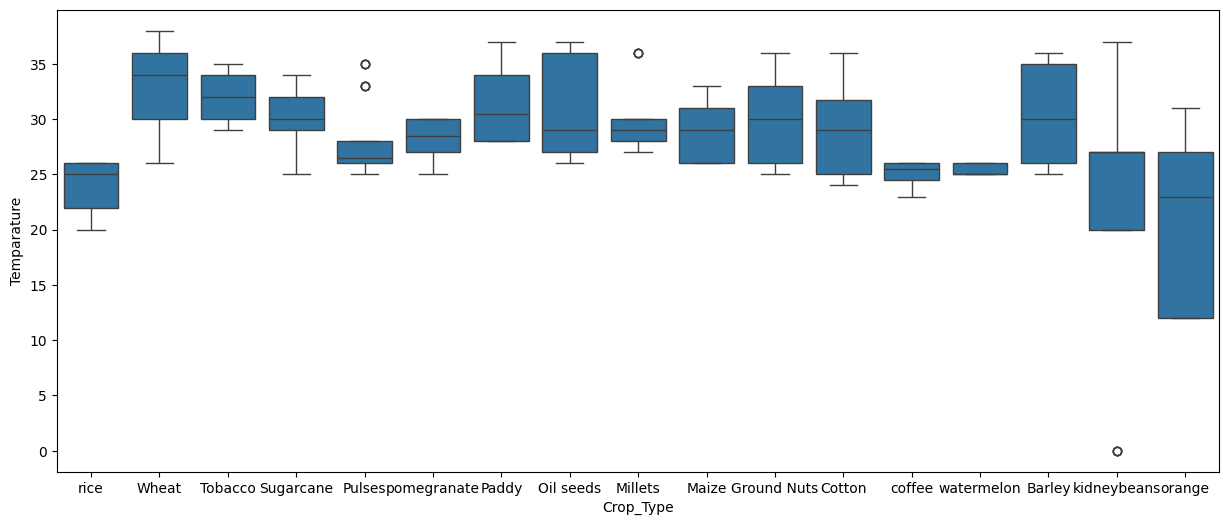

In [14]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Crop_Type'],y=df['Temparature'])

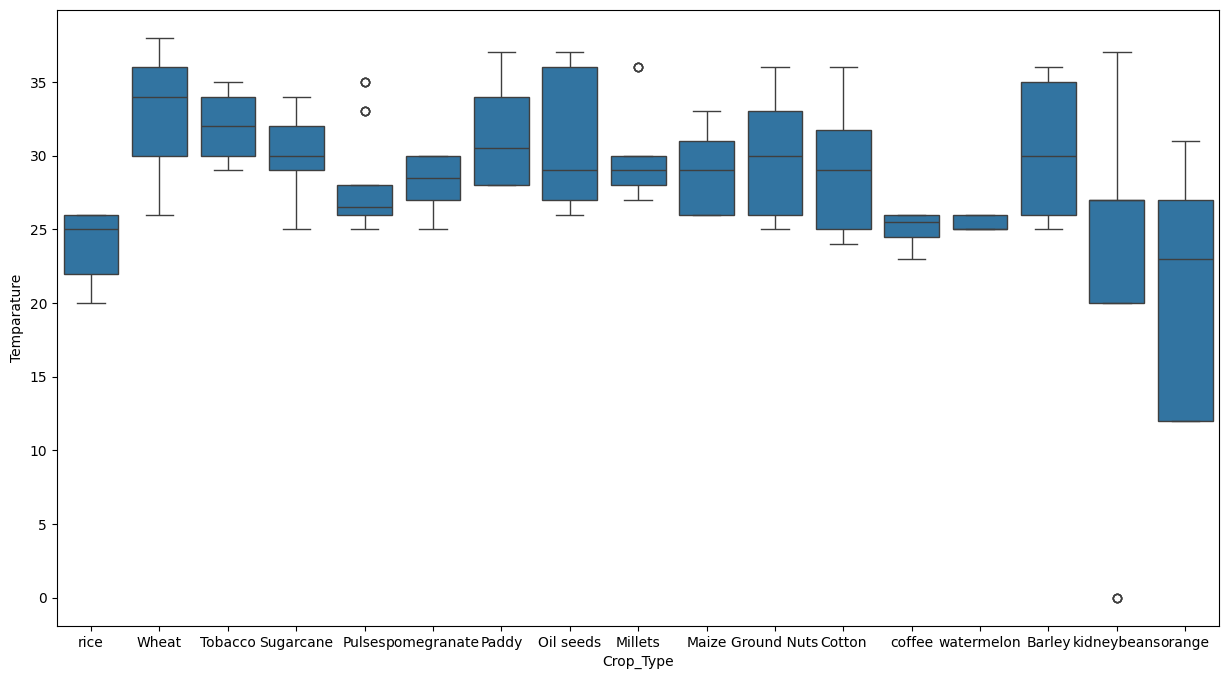

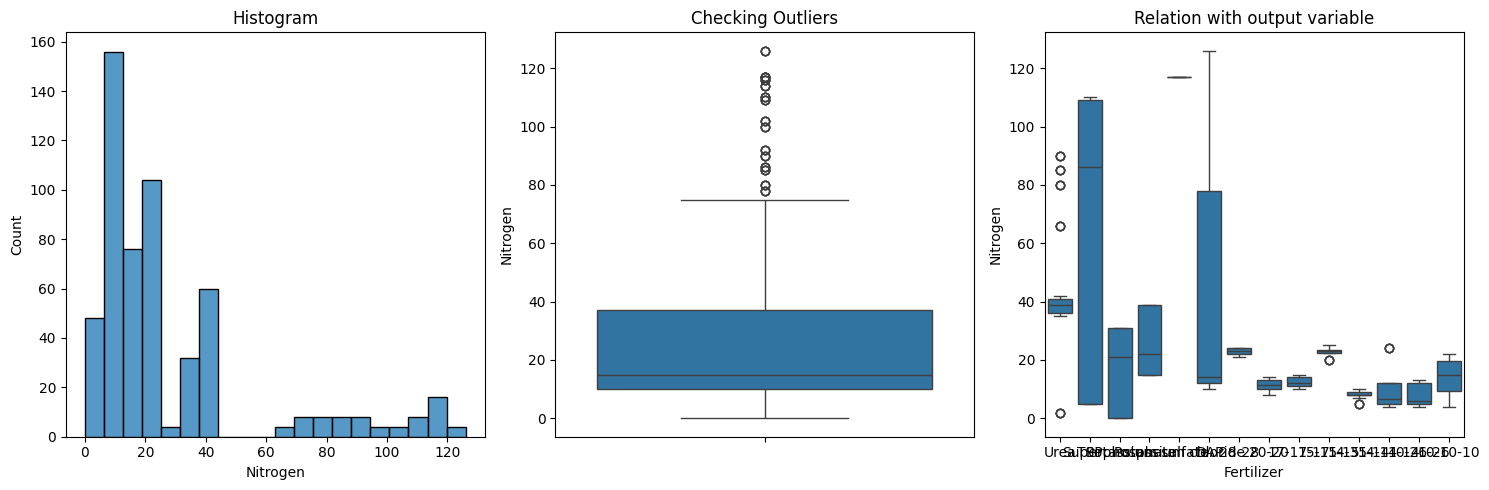

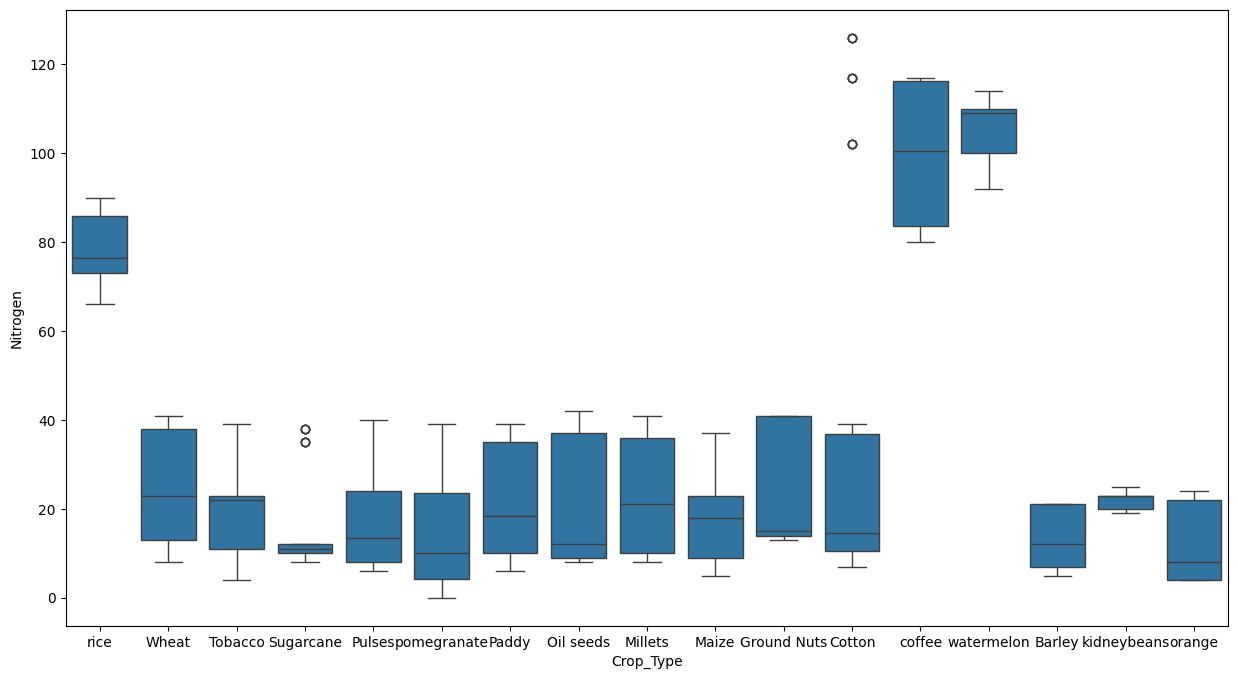

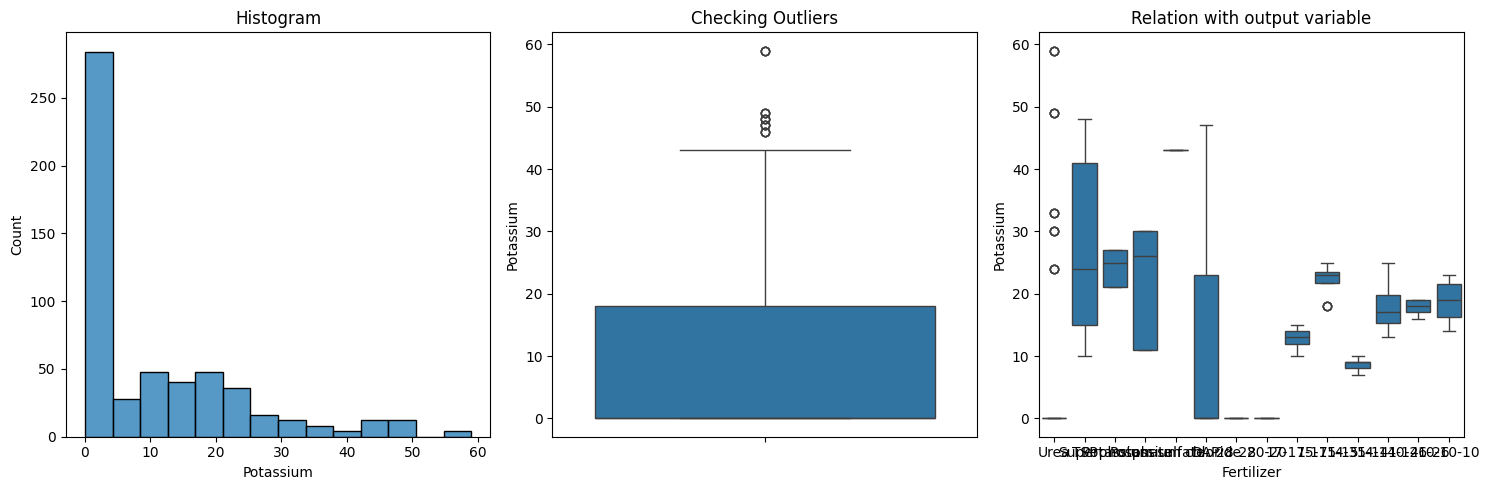

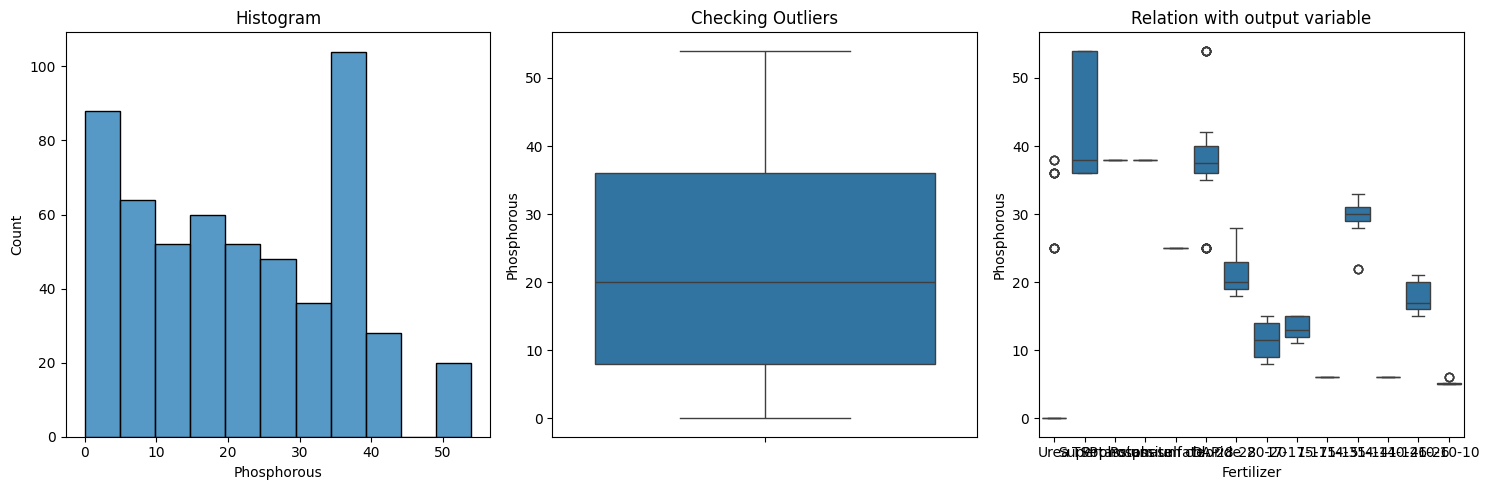

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop_Type'],y=df['Temparature'])
plot_conti(df['Nitrogen'])
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop_Type'],y=df['Nitrogen'])
plot_conti(df['Potassium'])
plot_conti(df['Phosphorous'])

In [16]:
y = df['Fertilizer'].copy()
X = df.drop('Fertilizer', axis=1).copy()

In [17]:
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [0, 1, 3, 4])
], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [18]:
X[0]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., 26.,
       90., 49., 36.])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

X = df.drop('Fertilizer', axis=1)

categorical_features = ['Soil_Type', 'Crop_Type']
numerical_features = X.select_dtypes(include=['number']).columns.tolist()


numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, train_size=0.8, shuffle=True, random_state=42)

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train[0]


array([ 0.45098766, -0.23850165,  0.10904647, -0.25871317, -0.77143696,
        0.43111605, -0.40824829, -0.44538698, -0.74351658, -0.41202096,
        2.06155281,  4.71280451, -0.37354368, -0.23457179, -0.21218788,
       -0.30262875, -0.24514517, -0.26037782, -0.26037782, -0.33291325,
       -0.2291418 , -0.25030102, -0.18107149, -0.20023571, -0.21795857,
       -0.26530803, -0.21795857, -0.1940285 ])

In [23]:
def evaluate_and_save_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} classification report")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    model_path = os.path.join('all_models', f'{model_name}_model.pkl')
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)

    return acc

In [24]:
!pip install --upgrade scikit-learn

ExtraTreesClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       1.00      1.00      1.00         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       1.00      1.00      1.00        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       1.00      1.00      1.00         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      1.00      1.00        24

          accuracy                           1.00       111
         macro avg       1.00      1.00      1.00      

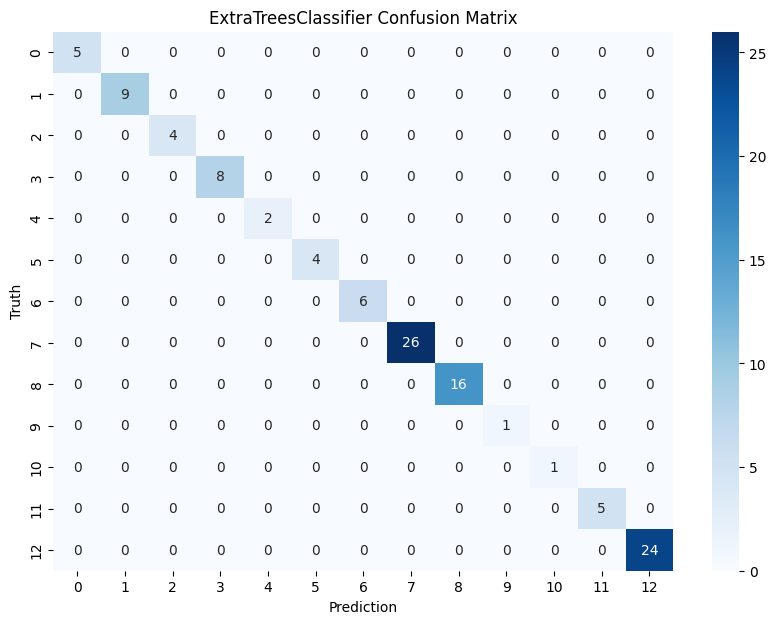

LinearDiscriminantAnalysis classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      0.80      0.89         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       0.89      1.00      0.94         8
          15-15-15       0.67      1.00      0.80         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       0.87      0.81      0.84        16
Potassium chloride       0.00      0.00      0.00         0
Potassium sulfate.       0.00      0.00      0.00         1
    Superphosphate       0.50      1.00      0.67         1
               TSP       0.67      0.80      0.73         5
              Urea       1.00      0.88      0.93        24

          accuracy                           0.92

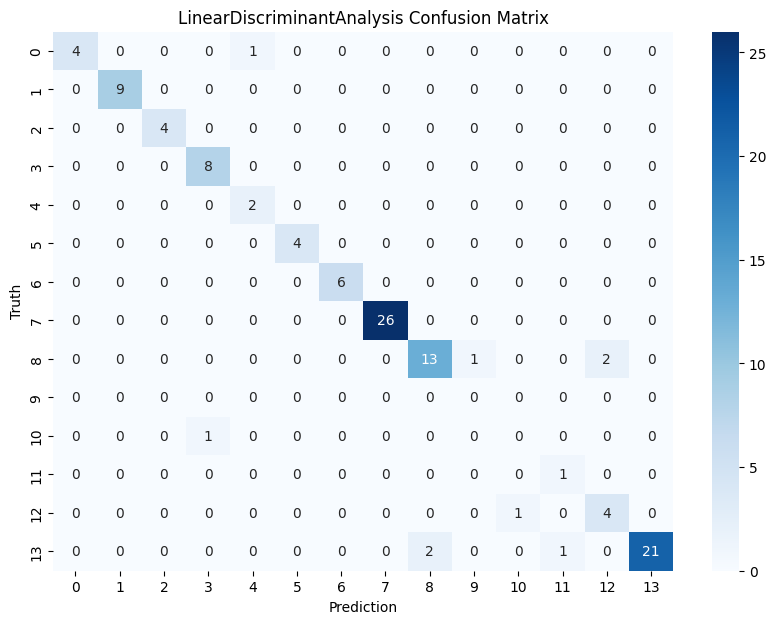

QuadraticDiscriminantAnalysis classification report
                    precision    recall  f1-score   support

          10-10-10       0.00      0.00      0.00         5
          10-26-26       0.00      0.00      0.00         9
          14-14-14       0.00      0.00      0.00         4
          14-35-14       0.00      0.00      0.00         8
          15-15-15       0.02      1.00      0.04         2
          17-17-17       0.00      0.00      0.00         4
             20-20       0.00      0.00      0.00         6
             28-28       0.00      0.00      0.00        26
               DAP       0.00      0.00      0.00        16
Potassium sulfate.       0.00      0.00      0.00         1
    Superphosphate       0.00      0.00      0.00         1
               TSP       0.00      0.00      0.00         5
              Urea       0.00      0.00      0.00        24

          accuracy                           0.02       111
         macro avg       0.00      0.08      0

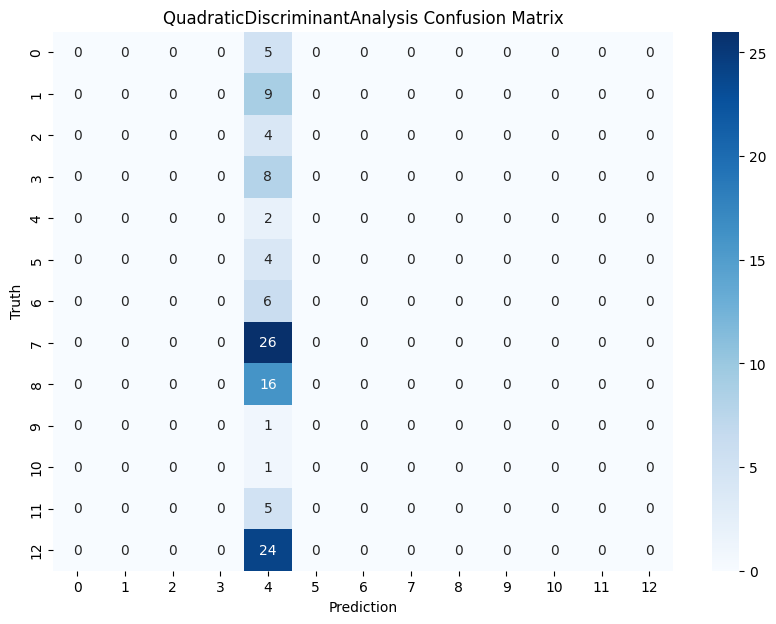

RidgeClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      0.80      0.89         5
          10-26-26       1.00      0.78      0.88         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       0.62      0.62      0.62         8
          15-15-15       0.67      1.00      0.80         2
          17-17-17       1.00      0.25      0.40         4
             20-20       0.80      0.67      0.73         6
             28-28       1.00      0.27      0.42        26
               DAP       0.42      0.88      0.57        16
Potassium sulfate.       0.00      0.00      0.00         1
    Superphosphate       0.50      1.00      0.67         1
               TSP       0.60      0.60      0.60         5
              Urea       0.68      0.88      0.76        24

          accuracy                           0.66       111
         macro avg       0.71      0.67      0.64       111


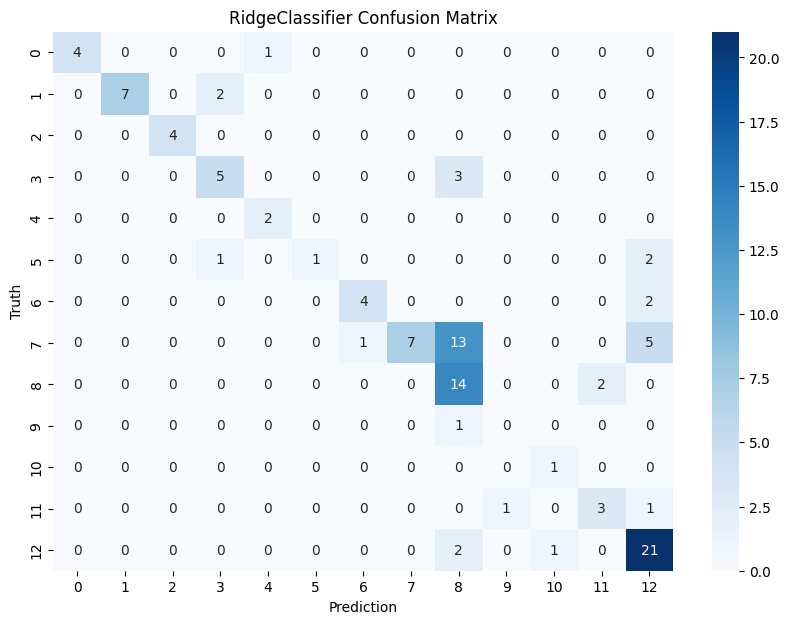

PassiveAggressiveClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       0.71      0.56      0.62         9
          14-14-14       0.80      1.00      0.89         4
          14-35-14       0.75      0.75      0.75         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       0.67      1.00      0.80         4
             20-20       0.75      1.00      0.86         6
             28-28       1.00      0.69      0.82        26
               DAP       0.79      0.94      0.86        16
Potassium sulfate.       0.20      1.00      0.33         1
    Superphosphate       0.20      1.00      0.33         1
               TSP       1.00      0.40      0.57         5
              Urea       1.00      0.88      0.93        24

          accuracy                           0.81       111
         macro avg       0.76      0.86      0.7

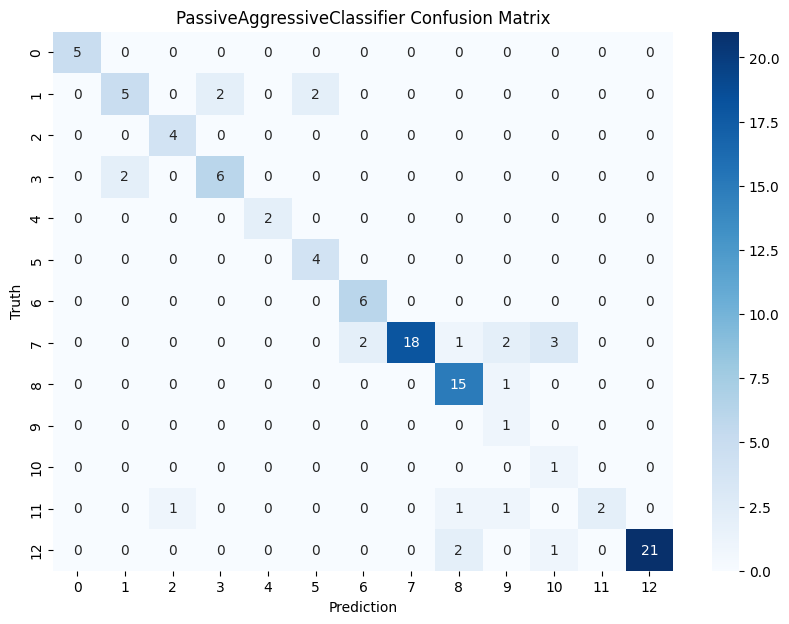

Perceptron classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       0.78      0.78      0.78         9
          14-14-14       0.80      1.00      0.89         4
          14-35-14       0.71      0.62      0.67         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       0.67      0.50      0.57         4
             20-20       0.67      1.00      0.80         6
             28-28       0.84      0.81      0.82        26
               DAP       0.83      0.62      0.71        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       0.00      0.00      0.00         1
               TSP       0.50      0.40      0.44         5
              Urea       0.85      0.96      0.90        24

          accuracy                           0.79       111
         macro avg       0.74      0.75      0.74       111
     

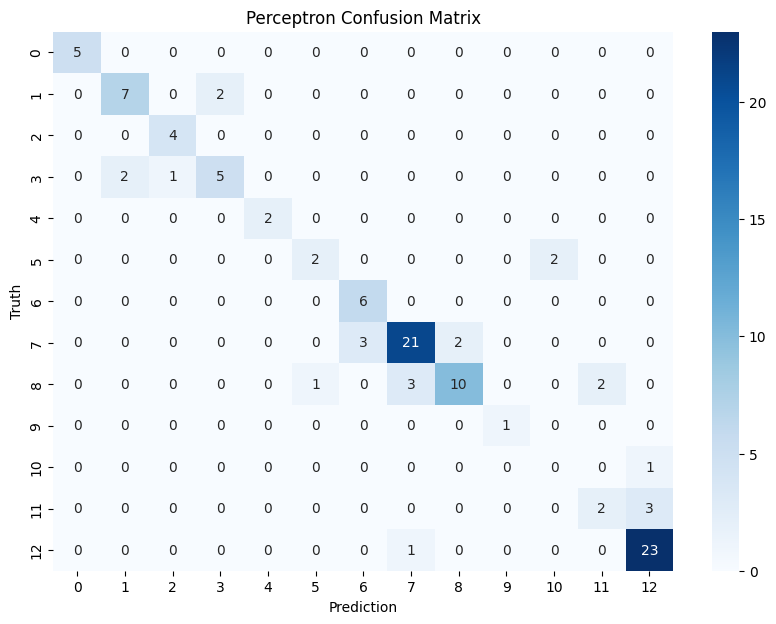

BaggingClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       1.00      1.00      1.00         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       1.00      1.00      1.00        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       1.00      1.00      1.00         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      1.00      1.00        24

          accuracy                           1.00       111
         macro avg       1.00      1.00      1.00       11

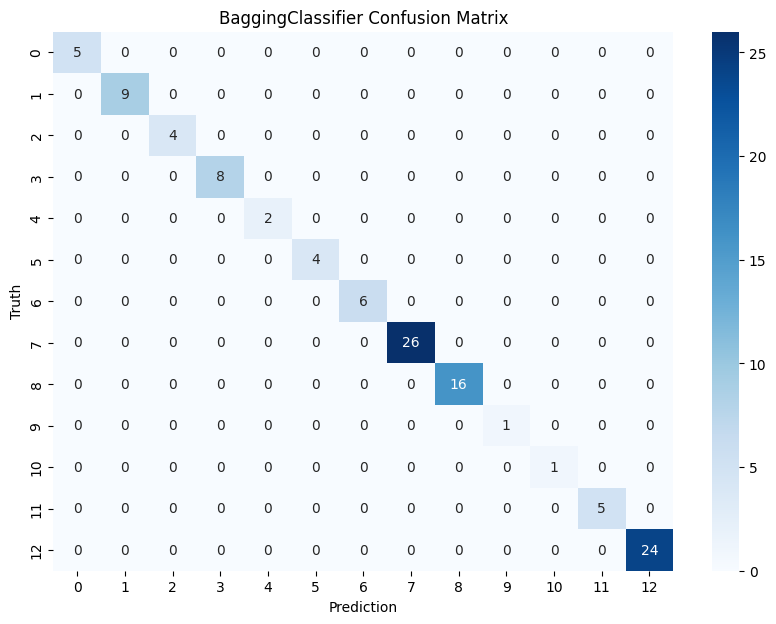

HistGradientBoostingClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       1.00      1.00      1.00         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       1.00      1.00      1.00        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       1.00      1.00      1.00         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      1.00      1.00        24

          accuracy                           1.00       111
         macro avg       1.00      1.00      

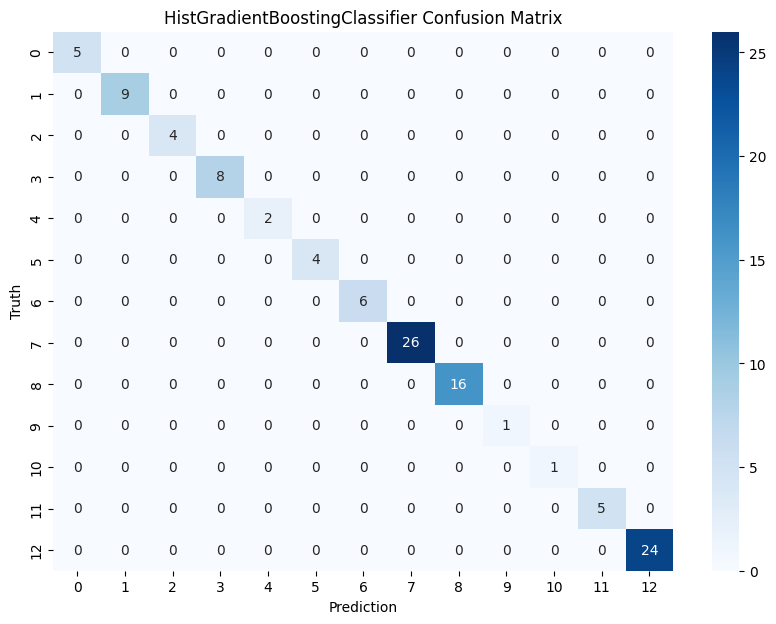

SGDClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      0.78      0.88         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       0.75      0.75      0.75         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      0.96      0.98        26
               DAP       0.76      1.00      0.86        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       0.50      1.00      0.67         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      0.88      0.93        24

          accuracy                           0.93       111
         macro avg       0.92      0.95      0.93       111
  

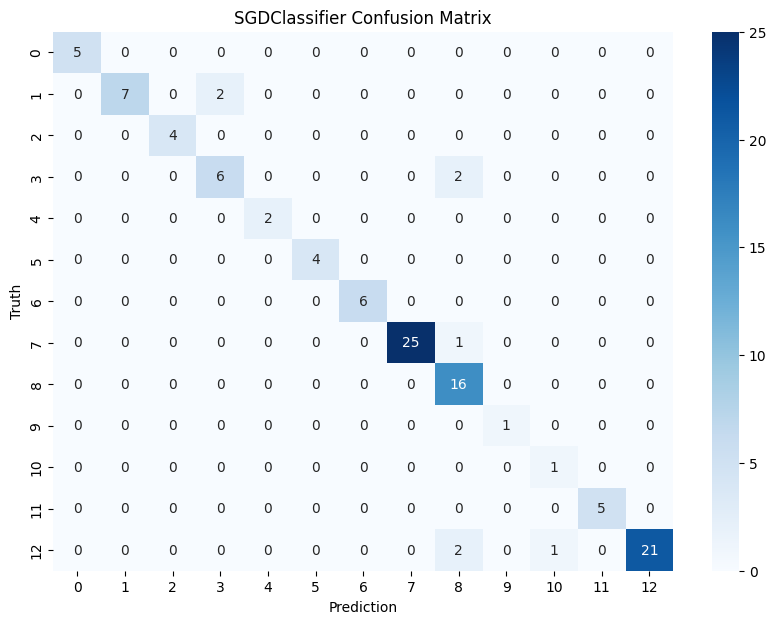

NearestCentroid classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      0.80      0.89         5
          10-26-26       0.22      0.44      0.30         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       0.15      0.38      0.21         8
          15-15-15       0.67      1.00      0.80         2
          17-17-17       0.09      0.25      0.13         4
             20-20       0.00      0.00      0.00         6
             28-28       0.37      0.27      0.31        26
               DAP       0.33      0.06      0.11        16
Potassium chloride       0.00      0.00      0.00         0
Potassium sulfate.       0.00      0.00      0.00         1
    Superphosphate       0.33      1.00      0.50         1
               TSP       0.50      0.80      0.62         5
              Urea       1.00      0.29      0.45        24

          accuracy                           0.34       111


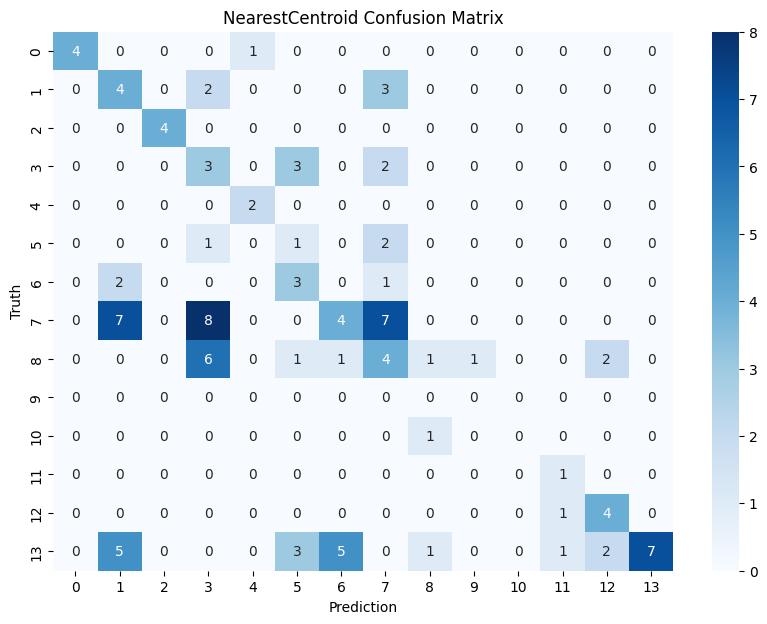

K-NeighborsClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       0.50      0.78      0.61         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       0.50      0.75      0.60         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      0.50      0.67         4
             20-20       0.55      1.00      0.71         6
             28-28       0.89      0.62      0.73        26
               DAP       0.88      0.88      0.88        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       1.00      1.00      1.00         1
               TSP       1.00      1.00      1.00         5
              Urea       0.85      0.71      0.77        24

          accuracy                           0.77       111
         macro avg       0.86      0.86      0.84     

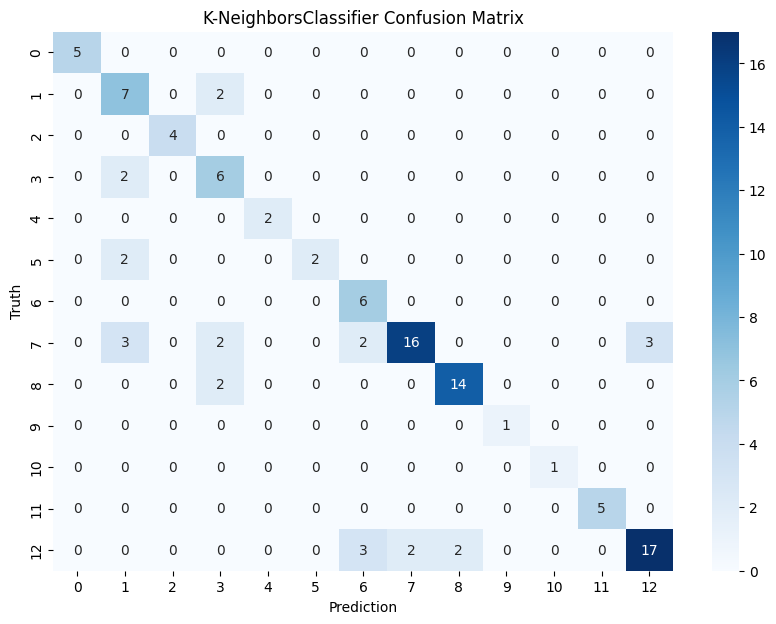

GradientBoostingClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       1.00      1.00      1.00         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       1.00      1.00      1.00        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       1.00      1.00      1.00         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      1.00      1.00        24

          accuracy                           1.00       111
         macro avg       1.00      1.00      1.00

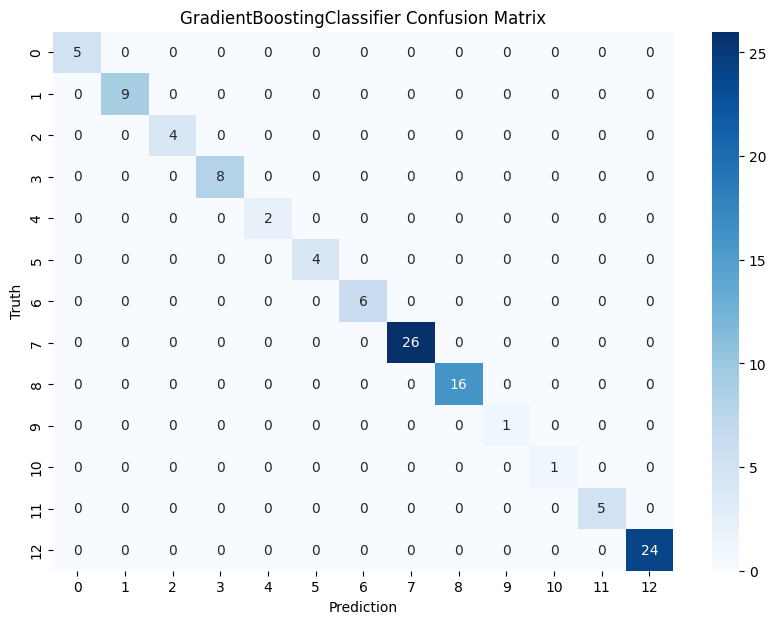

RandomForestClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       1.00      1.00      1.00         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       1.00      1.00      1.00        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       1.00      1.00      1.00         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      1.00      1.00        24

          accuracy                           1.00       111
         macro avg       1.00      1.00      1.00    

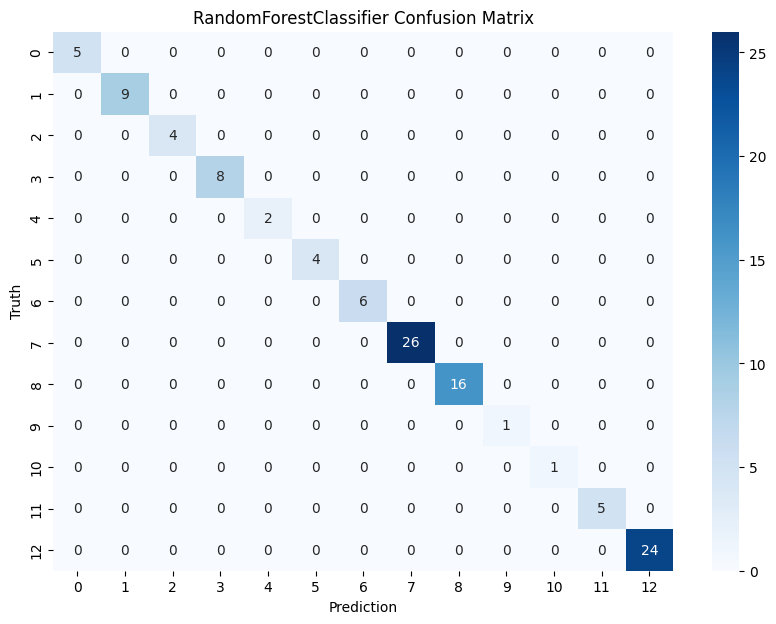

LogisticRegression classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      0.78      0.88         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       0.80      1.00      0.89         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       0.86      1.00      0.92         6
             28-28       1.00      0.85      0.92        26
               DAP       0.71      0.94      0.81        16
Potassium sulfate.       0.00      0.00      0.00         1
    Superphosphate       0.50      1.00      0.67         1
               TSP       0.83      1.00      0.91         5
              Urea       1.00      0.88      0.93        24

          accuracy                           0.90       111
         macro avg       0.82      0.88      0.84       1

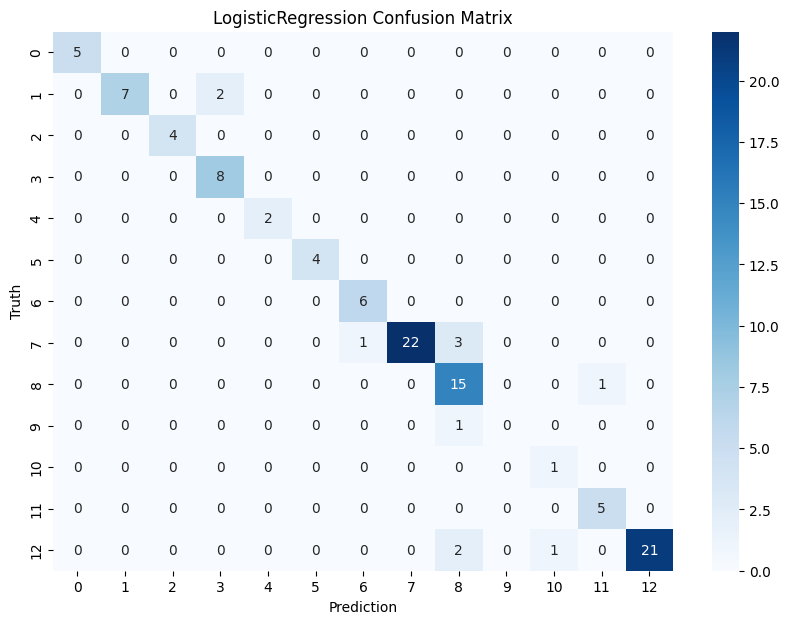

SupportVectorClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      0.80      0.89         5
          10-26-26       1.00      0.11      0.20         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       0.26      0.62      0.37         8
          15-15-15       0.67      1.00      0.80         2
          17-17-17       0.33      0.25      0.29         4
             20-20       0.38      0.83      0.53         6
             28-28       0.57      0.46      0.51        26
               DAP       0.75      0.75      0.75        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       0.50      1.00      0.67         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      0.79      0.88        24

          accuracy                           0.65       111
         macro avg       0.73      0.74      0.68   

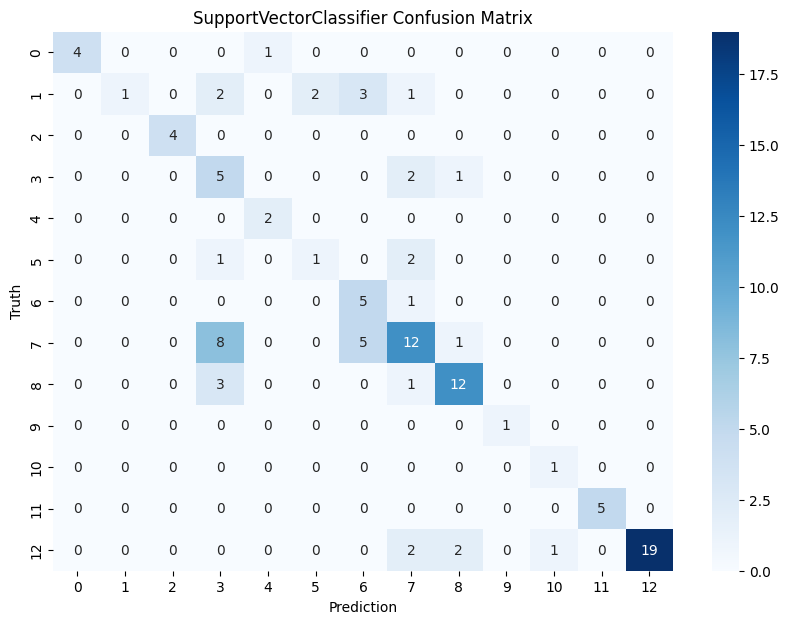

DecisionTreeClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       1.00      1.00      1.00         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       1.00      1.00      1.00        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       1.00      1.00      1.00         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      1.00      1.00        24

          accuracy                           1.00       111
         macro avg       1.00      1.00      1.00    

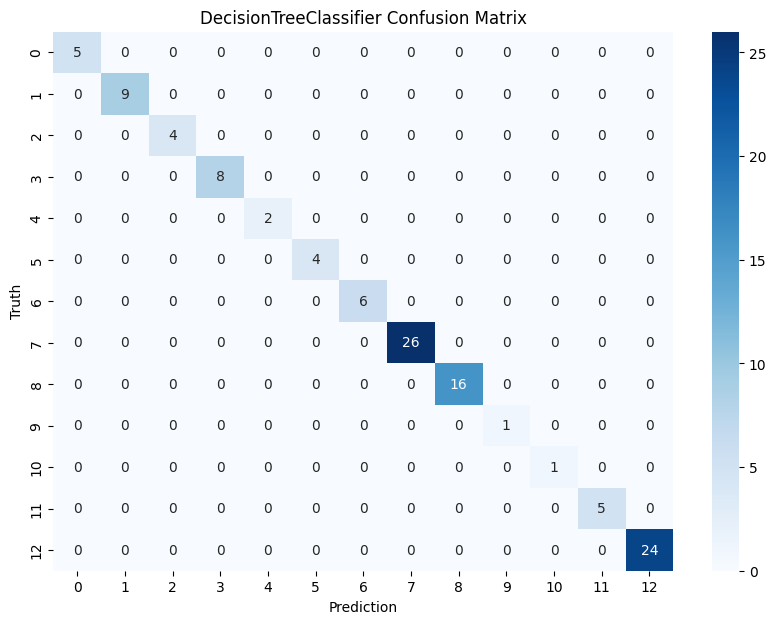

AdaBoostClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       0.00      0.00      0.00         5
          10-26-26       0.00      0.00      0.00         9
          14-14-14       0.00      0.00      0.00         4
          14-35-14       0.00      0.00      0.00         8
          15-15-15       0.00      0.00      0.00         2
          17-17-17       0.00      0.00      0.00         4
             20-20       0.00      0.00      0.00         6
             28-28       0.00      0.00      0.00        26
               DAP       0.46      1.00      0.63        16
Potassium sulfate.       0.00      0.00      0.00         1
    Superphosphate       0.00      0.00      0.00         1
               TSP       0.00      0.00      0.00         5
              Urea       0.27      0.83      0.41        24

          accuracy                           0.32       111
         macro avg       0.06      0.14      0.08       1

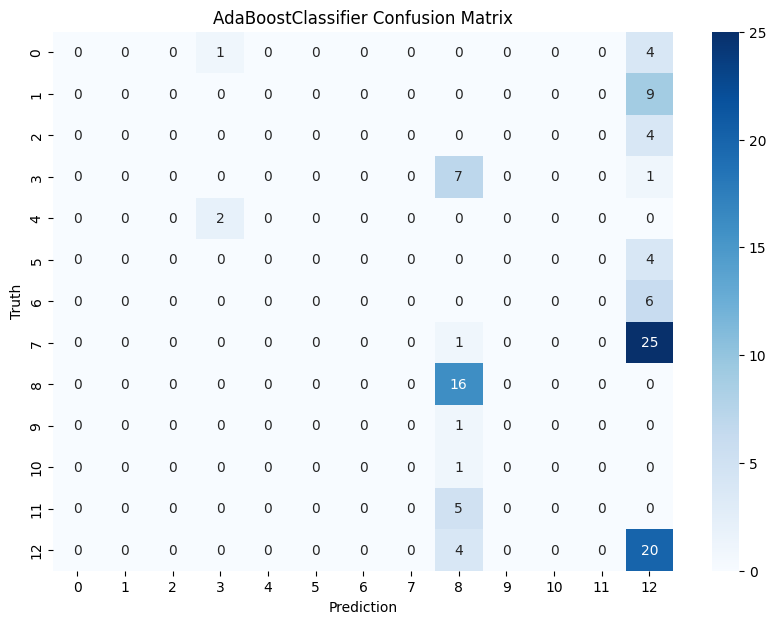

CatBoostClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       1.00      1.00      1.00         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       1.00      1.00      1.00        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       1.00      1.00      1.00         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      1.00      1.00        24

          accuracy                           1.00       111
         macro avg       1.00      1.00      1.00       1

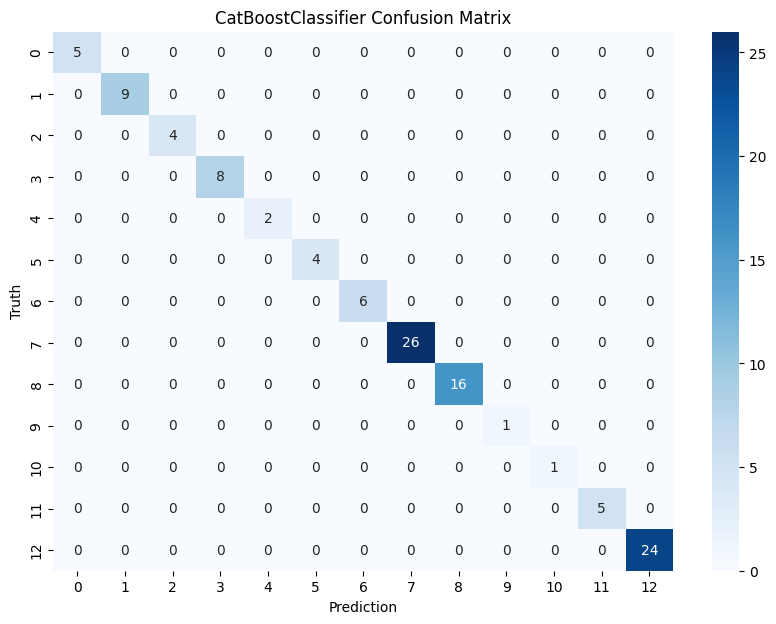

ExtraTreeClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       1.00      1.00      1.00         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       1.00      1.00      1.00        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       1.00      1.00      1.00         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      1.00      1.00        24

          accuracy                           1.00       111
         macro avg       1.00      1.00      1.00       

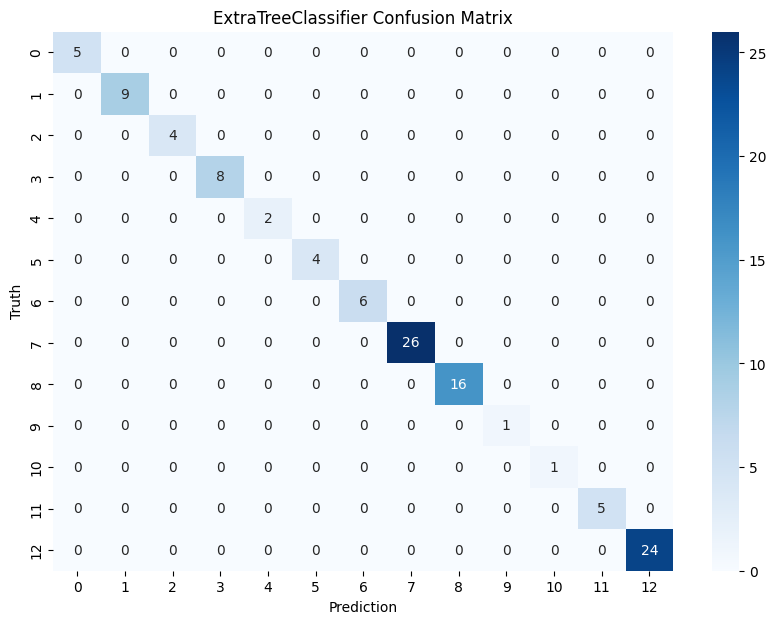

LabelPropagation classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       1.00      1.00      1.00         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       1.00      1.00      1.00        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       1.00      1.00      1.00         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      1.00      1.00        24

          accuracy                           1.00       111
         macro avg       1.00      1.00      1.00       111

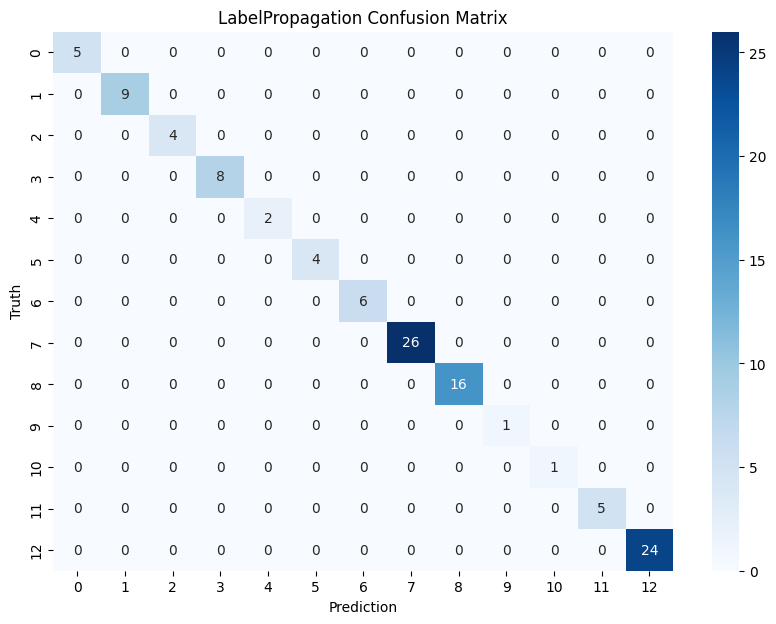

LabelSpreading classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       1.00      1.00      1.00         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       1.00      1.00      1.00        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       1.00      1.00      1.00         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      1.00      1.00        24

          accuracy                           1.00       111
         macro avg       1.00      1.00      1.00       111
 

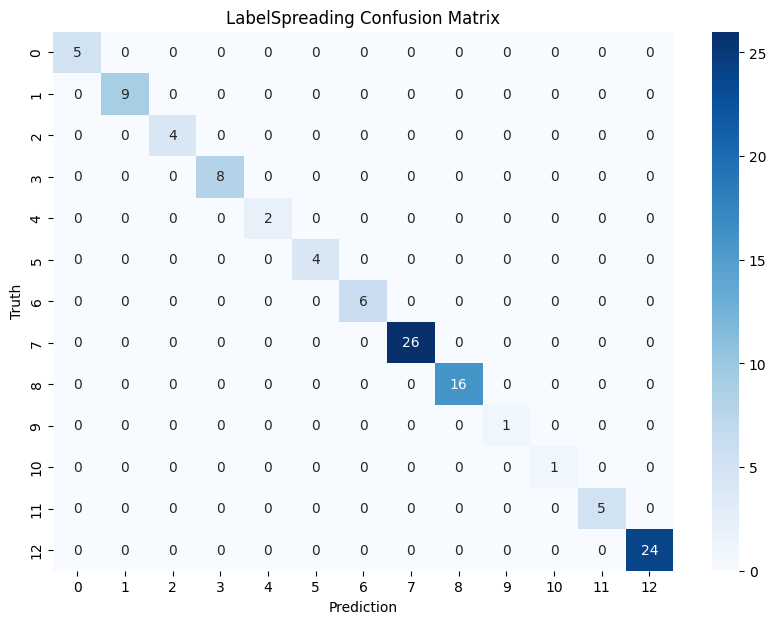

GaussianProcessClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       0.73      1.00      0.84         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       0.86      1.00      0.92         6
             28-28       1.00      0.85      0.92        26
               DAP       1.00      1.00      1.00        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       1.00      1.00      1.00         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      1.00      1.00        24

          accuracy                           0.96       111
         macro avg       0.97      0.99      0.98 

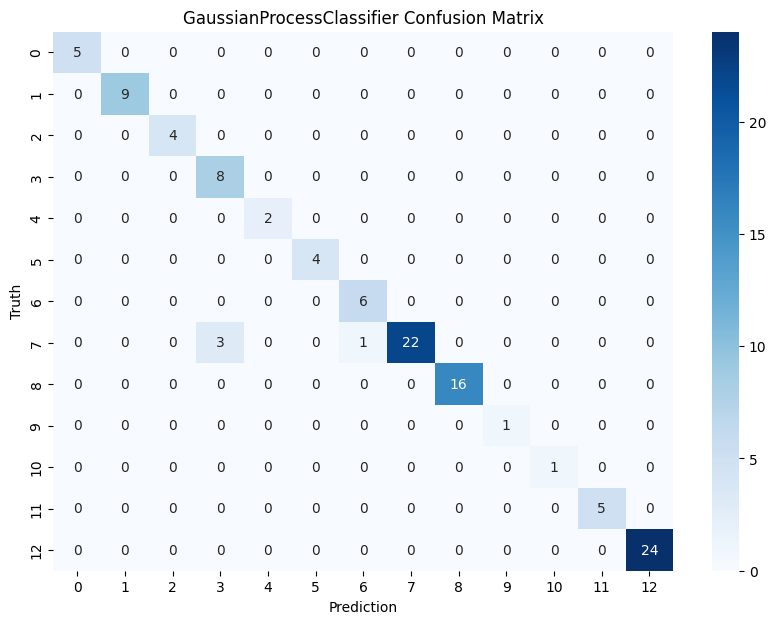

GaussianNB classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      0.80      0.89         5
          10-26-26       0.90      1.00      0.95         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       0.70      0.88      0.78         8
          15-15-15       0.67      1.00      0.80         2
          17-17-17       1.00      1.00      1.00         4
             20-20       0.46      1.00      0.63         6
             28-28       0.88      0.88      0.88        26
               DAP       0.50      0.19      0.27        16
Potassium sulfate.       0.50      1.00      0.67         1
    Superphosphate       0.33      1.00      0.50         1
               TSP       0.67      0.80      0.73         5
              Urea       1.00      0.83      0.91        24

          accuracy                           0.79       111
         macro avg       0.74      0.88      0.77       111
     

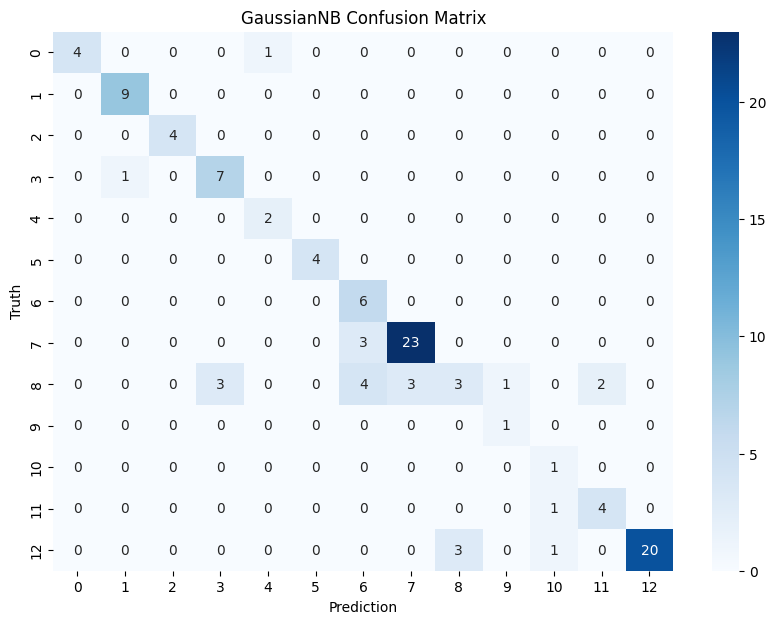

VotingClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      0.78      0.88         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       0.80      1.00      0.89         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       0.89      1.00      0.94        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       0.50      1.00      0.67         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      0.88      0.93        24

          accuracy                           0.95       111
         macro avg       0.94      0.97      0.95       111

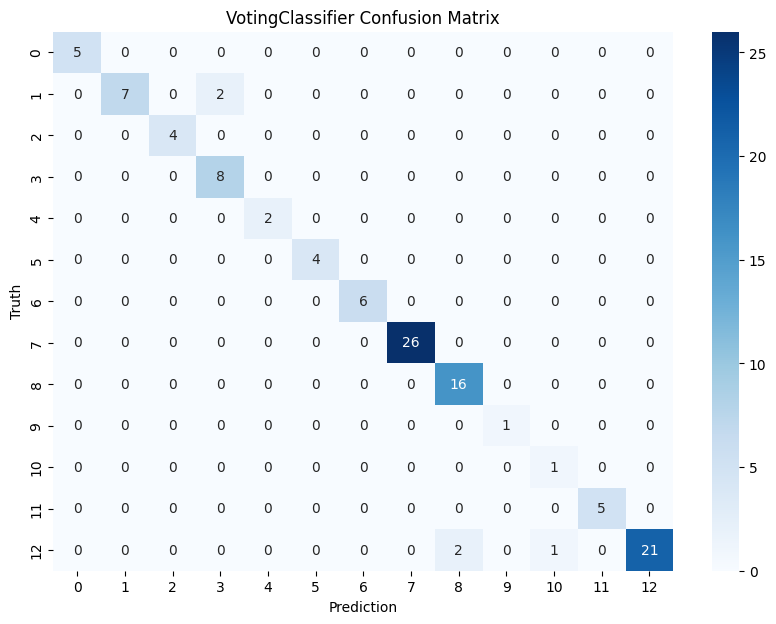

StackingClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       1.00      1.00      1.00         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       1.00      1.00      1.00        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       1.00      1.00      1.00         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      1.00      1.00        24

          accuracy                           1.00       111
         macro avg       1.00      1.00      1.00       1

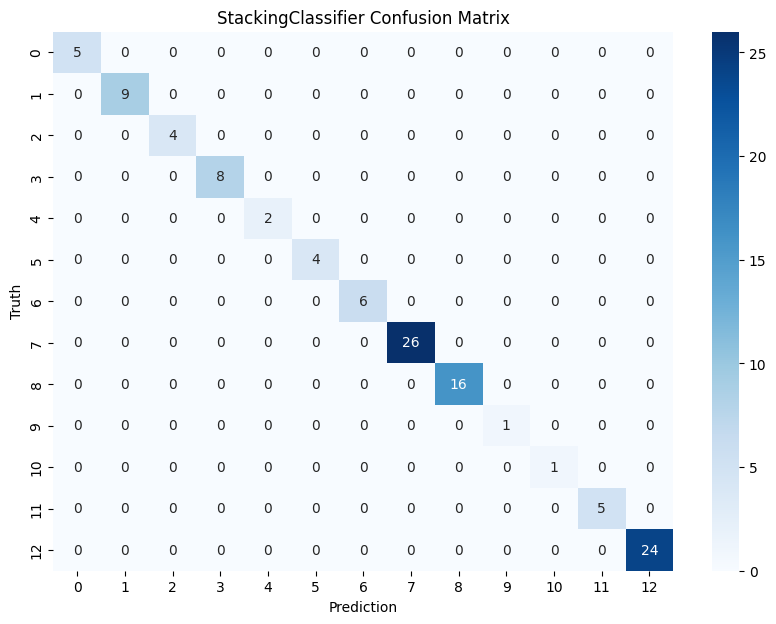

BaggingClassifier_SVC classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      0.80      0.89         5
          10-26-26       1.00      0.56      0.71         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       0.29      0.50      0.36         8
          15-15-15       0.67      1.00      0.80         2
          17-17-17       1.00      0.75      0.86         4
             20-20       0.36      0.83      0.50         6
             28-28       0.68      0.50      0.58        26
               DAP       0.67      0.88      0.76        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       0.50      1.00      0.67         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      0.67      0.80        24

          accuracy                           0.69       111
         macro avg       0.78      0.81      0.76     

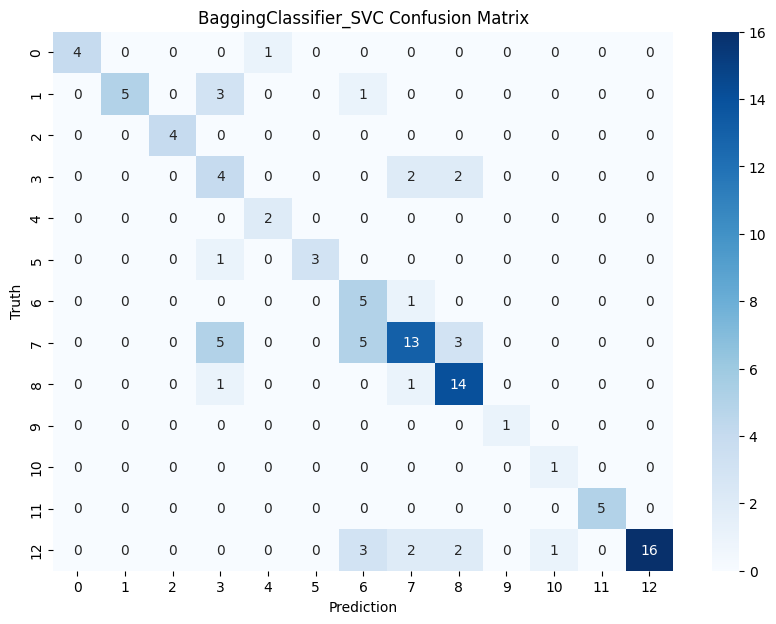

MLPClassifier classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       1.00      1.00      1.00         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       1.00      1.00      1.00        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       1.00      1.00      1.00         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      1.00      1.00        24

          accuracy                           1.00       111
         macro avg       1.00      1.00      1.00       111
  

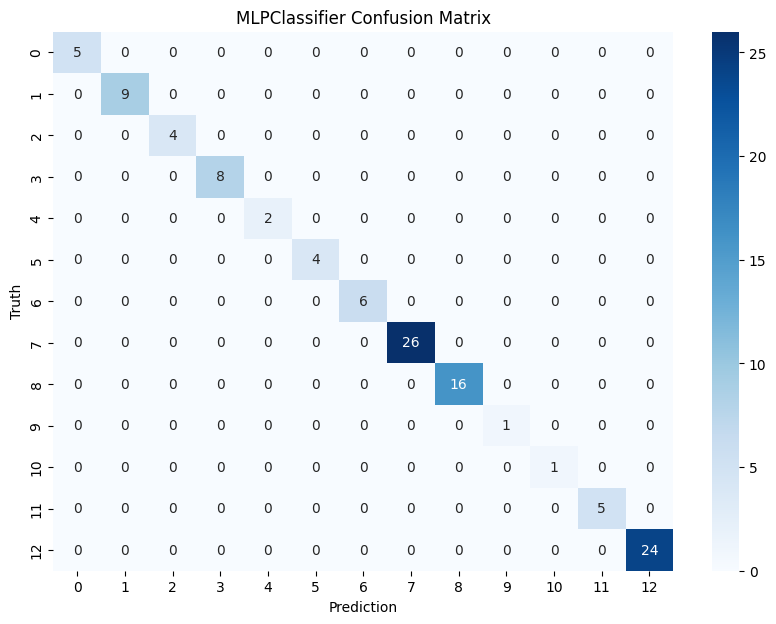

LinearSVC classification report
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      0.78      0.88         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       0.80      1.00      0.89         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       0.88      0.94      0.91        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       0.50      1.00      0.67         1
               TSP       0.83      1.00      0.91         5
              Urea       1.00      0.88      0.93        24

          accuracy                           0.95       111
         macro avg       0.92      0.97      0.94       111
      

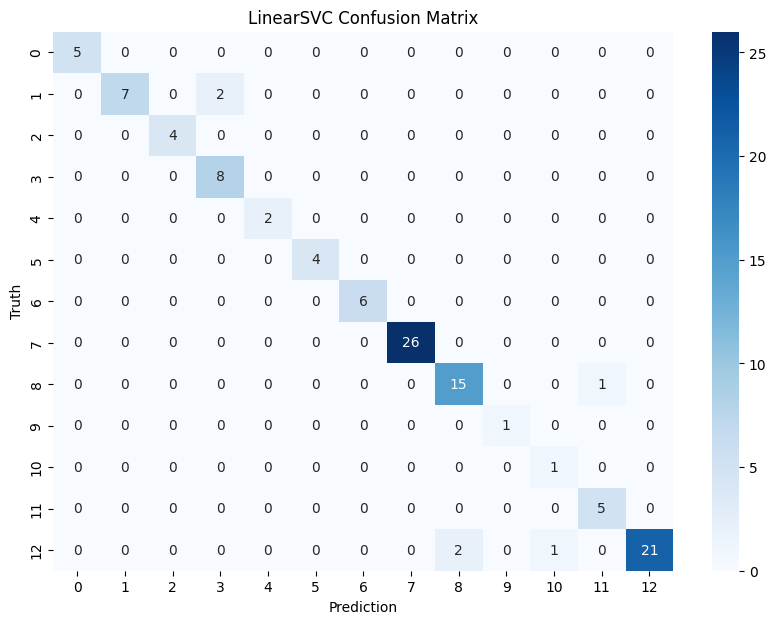

All files saved and zipped in all_models.zip


In [25]:
models = {
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "RidgeClassifier": RidgeClassifier(),
    "PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
    "Perceptron": Perceptron(),
    "BaggingClassifier": BaggingClassifier(),
    "HistGradientBoostingClassifier": HistGradientBoostingClassifier(),
    "SGDClassifier": SGDClassifier(),
    "NearestCentroid": NearestCentroid(),
    "K-NeighborsClassifier": KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "RandomForestClassifier": RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42),
    "LogisticRegression": LogisticRegression(solver='liblinear',max_iter=1000),
    "SupportVectorClassifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "CatBoostClassifier": CatBoostClassifier(verbose=0),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    "LabelPropagation": LabelPropagation(),
    "LabelSpreading": LabelSpreading(),
    "GaussianProcessClassifier": GaussianProcessClassifier(),
    "GaussianNB": GaussianNB(),
    "VotingClassifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('svc', SVC())
    ], voting='hard'),
    "StackingClassifier": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('svc', SVC())
        ], final_estimator=LogisticRegression()
    ),
    "BaggingClassifier_SVC": BaggingClassifier(estimator=SVC(), n_estimators=10),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "LinearSVC": LinearSVC(max_iter=10000),

}

if not os.path.exists('all_models'):
    os.makedirs('all_models')

accuracies = {}
for model_name, model in models.items():
    acc = evaluate_and_save_model(model, model_name)
    accuracies[model_name] = acc


zip_path = 'all_models.zip'
with zipfile.ZipFile(zip_path, 'w') as zipf:
    for root, dirs, files in os.walk("/kaggle/working/all_models"):
        for file in files:
            zipf.write(os.path.join(root, file),
                       arcname=os.path.relpath(os.path.join(root, file),
                                              "/content/all_models"))
print(f"All files saved and zipped in {zip_path}")

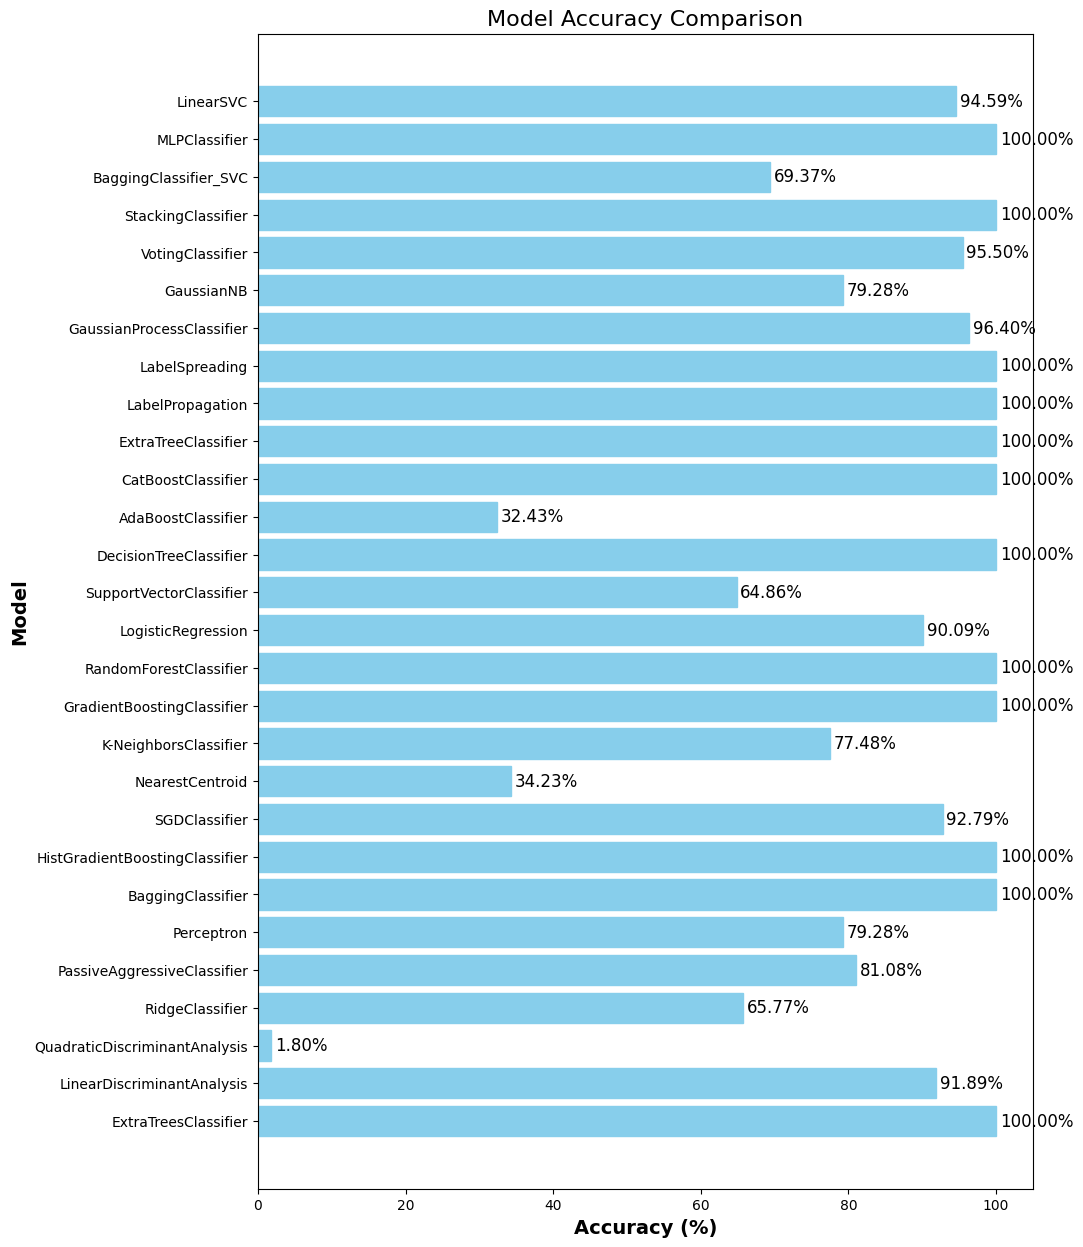

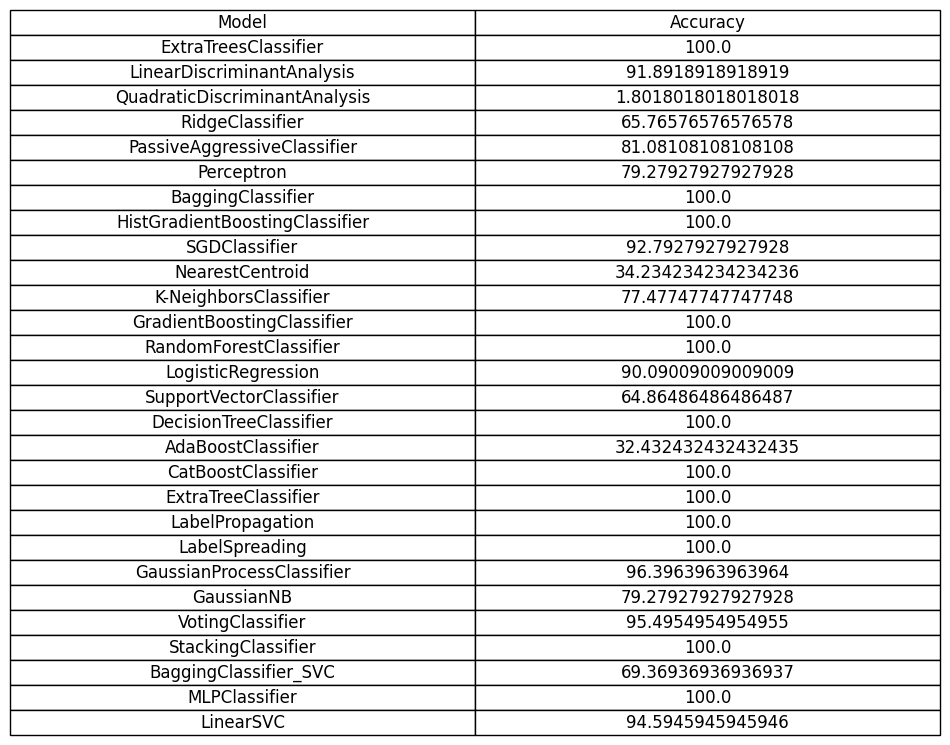

The best model is ExtraTreesClassifier with an accuracy of 100.00%


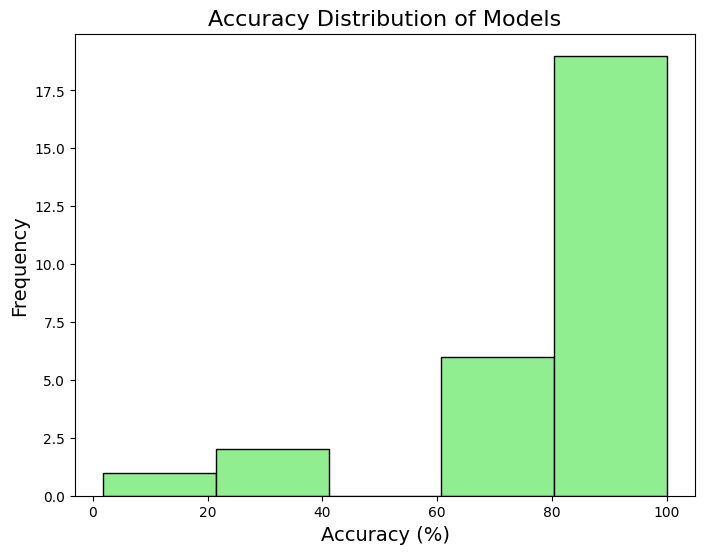

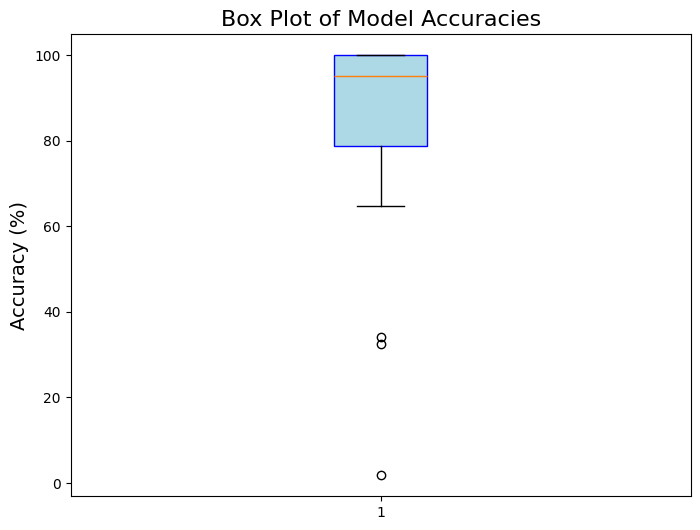

Top 5 models based on accuracy:
                     Model  Accuracy
0     ExtraTreesClassifier     100.0
15  DecisionTreeClassifier     100.0
26           MLPClassifier     100.0
24      StackingClassifier     100.0
6        BaggingClassifier     100.0


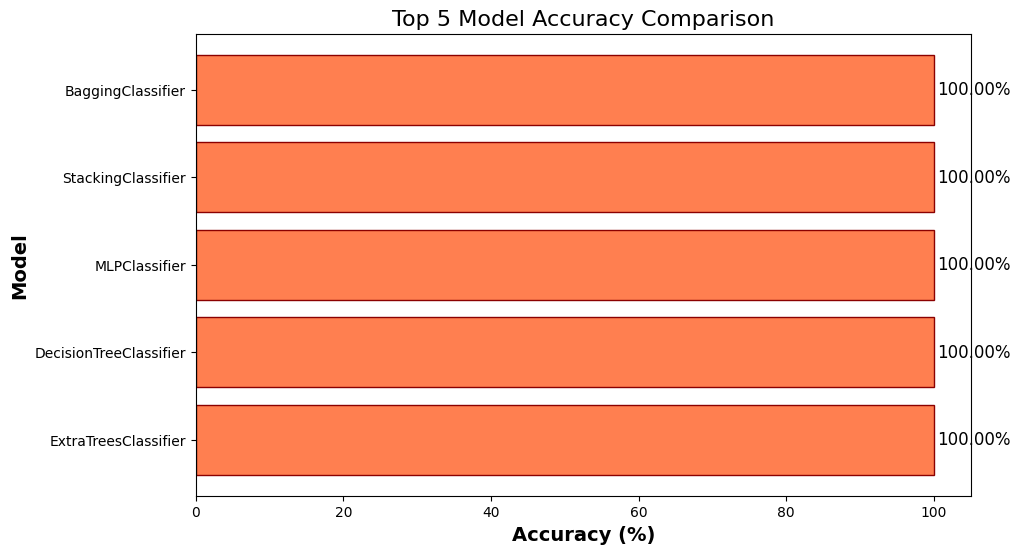

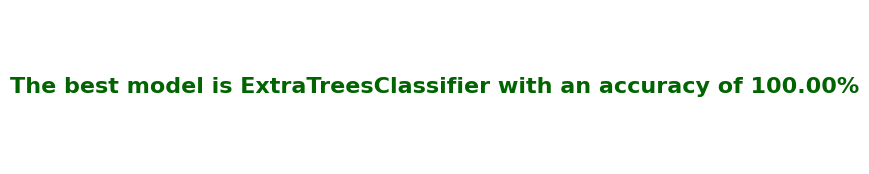

In [26]:
model_comparison_table = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
model_comparison_table['Accuracy'] = model_comparison_table['Accuracy'] * 100

model_comparison_table.to_csv("Model_Accuracy_Comparison.csv", index=False)

fig, ax = plt.subplots(figsize=(10, 15))
bars = ax.barh(model_comparison_table['Model'], model_comparison_table['Accuracy'], color='skyblue', edgecolor='skyblue')
ax.set_xlabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Model', fontsize=14, fontweight='bold')
ax.set_title('Model Accuracy Comparison', fontsize=16)

for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f"{width:.2f}%", ha='left', va='center', fontsize=12)

plt.savefig("Model_Accuracy_Comparison_BarChart.png", bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table_data = model_comparison_table.values
table = ax.table(cellText=table_data, colLabels=model_comparison_table.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

plt.savefig("Model_Accuracy_Comparison_Table.png", bbox_inches='tight')
plt.show()

best_model_name = model_comparison_table.loc[model_comparison_table['Accuracy'].idxmax(), 'Model']
best_model_accuracy = model_comparison_table['Accuracy'].max()
print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}%")

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(model_comparison_table['Accuracy'], bins=5, color='lightgreen', edgecolor='black')
ax.set_title("Accuracy Distribution of Models", fontsize=16)
ax.set_xlabel("Accuracy (%)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)

plt.savefig("Model_Accuracy_Distribution.png", bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(model_comparison_table['Accuracy'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
ax.set_title("Box Plot of Model Accuracies", fontsize=16)
ax.set_ylabel("Accuracy (%)", fontsize=14)

plt.savefig("Model_Accuracy_BoxPlot.png", bbox_inches='tight')
plt.show()

top_five_models = model_comparison_table.sort_values(by='Accuracy', ascending=False).head(5)
print("Top 5 models based on accuracy:")
print(top_five_models)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_five_models['Model'], top_five_models['Accuracy'], color='coral', edgecolor='darkred')
ax.set_xlabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Model', fontsize=14, fontweight='bold')
ax.set_title('Top 5 Model Accuracy Comparison', fontsize=16)

for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f"{width:.2f}%", ha='left', va='center', fontsize=12)

plt.savefig("Top_5_Model_Accuracy_Comparison_BarChart.png", bbox_inches='tight')
plt.show()


fig, ax = plt.subplots(figsize=(10, 2))
ax.text(0.5, 0.5, f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}%",
        ha='center', va='center', fontsize=16, fontweight='bold', color='darkgreen')
ax.axis('off')

plt.savefig("Model_Final_Decision.png", bbox_inches='tight')
plt.show()